### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Data Understanding

In [2]:
df_1 = pd.read_csv(r'C:\Users\User\Desktop\Project Data Science\SanberCode_Handphone\train.csv')
df_2 = pd.read_csv(r'C:\Users\User\Desktop\Project Data Science\SanberCode_Handphone\test.csv')

In [3]:
df_1.duplicated().any()

False

In [4]:
df_2.duplicated().any()

False

### EDA

In [5]:
mean_kecepatan_clock = round(df_1['kecepatan_clock'].mean())
df_1['kecepatan_clock'].fillna(value = mean_kecepatan_clock, inplace = True)

mean_panjang_layar = round(df_1['panjang_layar'].mean())
df_1['panjang_layar'].fillna(value = mean_panjang_layar, inplace = True)

In [6]:
four_g = []
for i in df_1['four_g']:
  if i == 'Ya':
    four_g.append(1)
  elif i == 'Tidak':
    four_g.append(0)

df_1['four_g'] = four_g   

four_g = []
for i in df_2['four_g']:
  if i == 'Ya':
    four_g.append(1)
  elif i == 'Tidak':
    four_g.append(0)

df_2['four_g'] = four_g   

In [7]:
tabel_harga = []
for i in df_1['price_range']:
  if i == '0-<1000k':
    tabel_harga.append(0)
  elif i == '1000k-<2000k':
    tabel_harga.append(1)
  elif i == '2000k-3000k':
    tabel_harga.append(2)
  elif i == '>3000k':
    tabel_harga.append(3)

df_1['price_range'] = tabel_harga

### Visualization

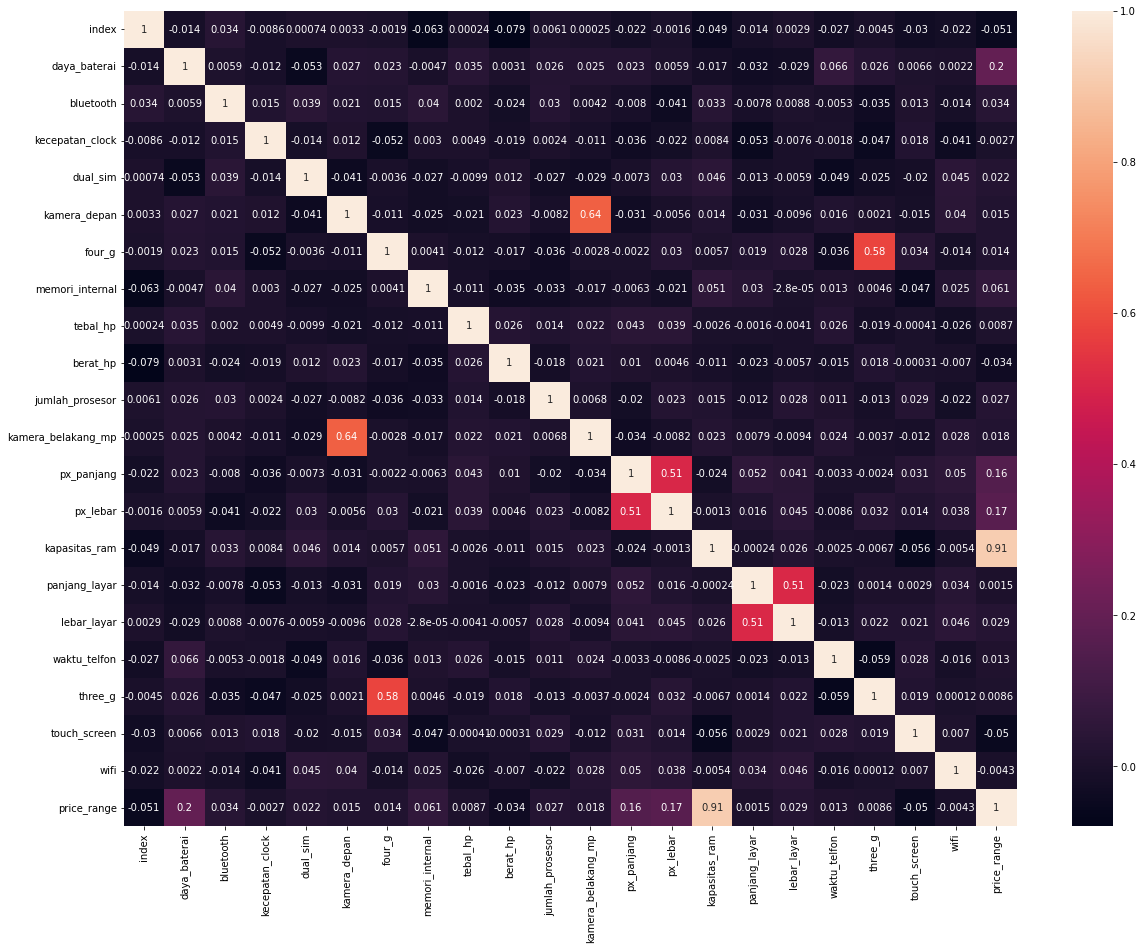

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(df_1.corr(), annot=True);

### Modelling & Validation

In [9]:
df_1.corr()['price_range']

index                -0.051263
daya_baterai          0.195546
bluetooth             0.033804
kecepatan_clock      -0.002732
dual_sim              0.022209
kamera_depan          0.015192
four_g                0.013896
memori_internal       0.060785
tebal_hp              0.008653
berat_hp             -0.034209
jumlah_prosesor       0.027331
kamera_belakang_mp    0.017791
px_panjang            0.155272
px_lebar              0.168936
kapasitas_ram         0.912224
panjang_layar         0.001547
lebar_layar           0.029435
waktu_telfon          0.012680
three_g               0.008559
touch_screen         -0.050117
wifi                 -0.004256
price_range           1.000000
Name: price_range, dtype: float64

In [10]:
temp = pd.DataFrame()
temp['variabel'] = df_1.corr()['price_range'].index
temp['corr'] = df_1.corr()['price_range'].values
temp['abs'] = abs(df_1.corr()['price_range'].values)

In [11]:
temp.sort_values('abs', ascending = False)

,variabel,corr,abs
21,price_range,1.000000,1.000000
14,kapasitas_ram,0.912224,0.912224
1,daya_baterai,0.195546,0.195546
13,px_lebar,0.168936,0.168936
12,px_panjang,0.155272,0.155272
7,memori_internal,0.060785,0.060785
0,index,-0.051263,0.051263
19,touch_screen,-0.050117,0.050117
9,berat_hp,-0.034209,0.034209
2,bluetooth,0.033804,0.033804


In [12]:
x = df_1[['kapasitas_ram', 'daya_baterai', 'memori_internal', 'touch_screen', 'berat_hp', 'bluetooth', 
          'dual_sim', 'kamera_belakang_mp', 'kamera_depan', 'four_g']]
y = df_1['price_range']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=42)

In [13]:
RF = RandomForestClassifier(n_estimators=1000, criterion='entropy', min_samples_split=5, min_samples_leaf=45, random_state=42)
RF.fit(x_train, y_train)
y_pred_test = RF.predict(x_test)
y_pred_train = RF.predict(x_train)
acc_test = RF.score(x_test,y_test)
acc_train = RF.score(x_train,y_train)

In [14]:
print(f"Training Accuracy: {acc_train}")
print(f"Testing Accuracy: {acc_test}")

if acc_train-acc_test <= abs(0.05):
    print("Just Right!")
    print(abs(acc_train-acc_test))
else:
    print("Overfitting")
    print(abs(acc_train-acc_test))

Training Accuracy: 0.8247619047619048
Testing Accuracy: 0.7733333333333333
Overfitting
0.05142857142857149


In [15]:
cr = print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       113
           1       0.70      0.77      0.73       117
           2       0.70      0.58      0.63       112
           3       0.83      0.83      0.83       108

    accuracy                           0.77       450
   macro avg       0.77      0.77      0.77       450
weighted avg       0.77      0.77      0.77       450



In [16]:
x_test = df_2[['kapasitas_ram', 'daya_baterai', 'memori_internal', 'touch_screen', 'berat_hp', 'bluetooth', 
          'dual_sim', 'kamera_belakang_mp', 'kamera_depan', 'four_g']]
y_predict_test = RF.predict(x_test)

In [17]:
price_range = pd.DataFrame(y_predict_test, columns=['price_range'])
price_range

,price_range
0,3
1,0
2,2
3,1
4,3
...,...
495,3
496,1
497,1
498,3


In [18]:
final = pd.concat([df_2['index'], price_range], axis=1)
final

,index,price_range
0,405,3
1,1190,0
2,1132,2
3,731,1
4,1754,3
...,...,...
495,936,3
496,1524,1
497,1415,1
498,1223,3
